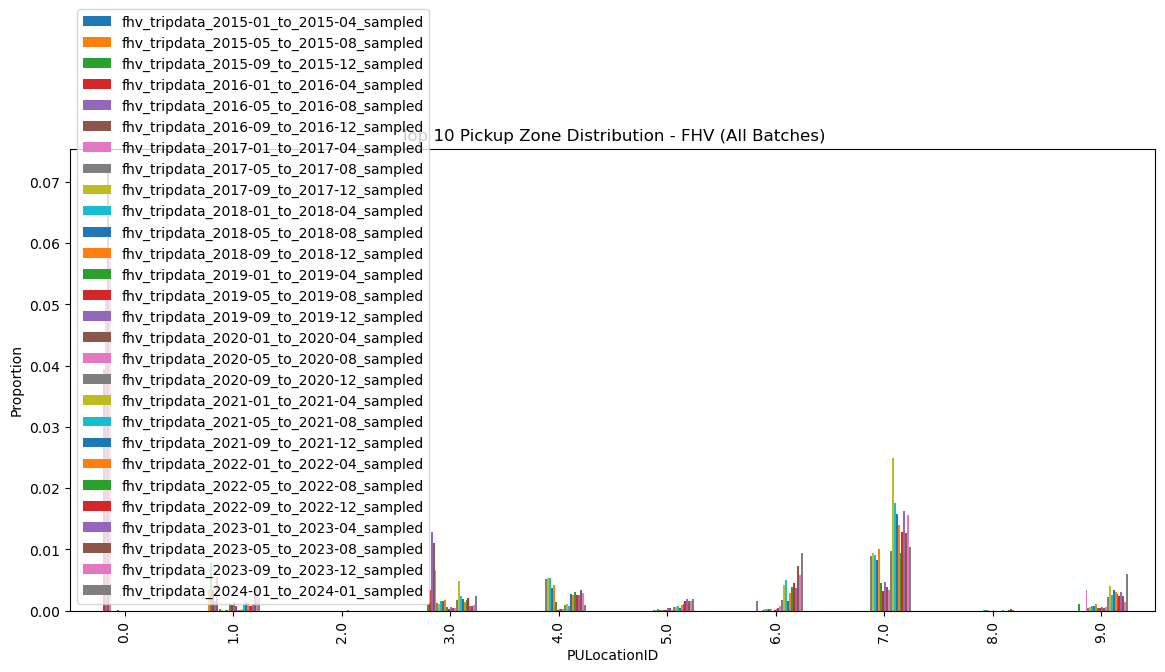

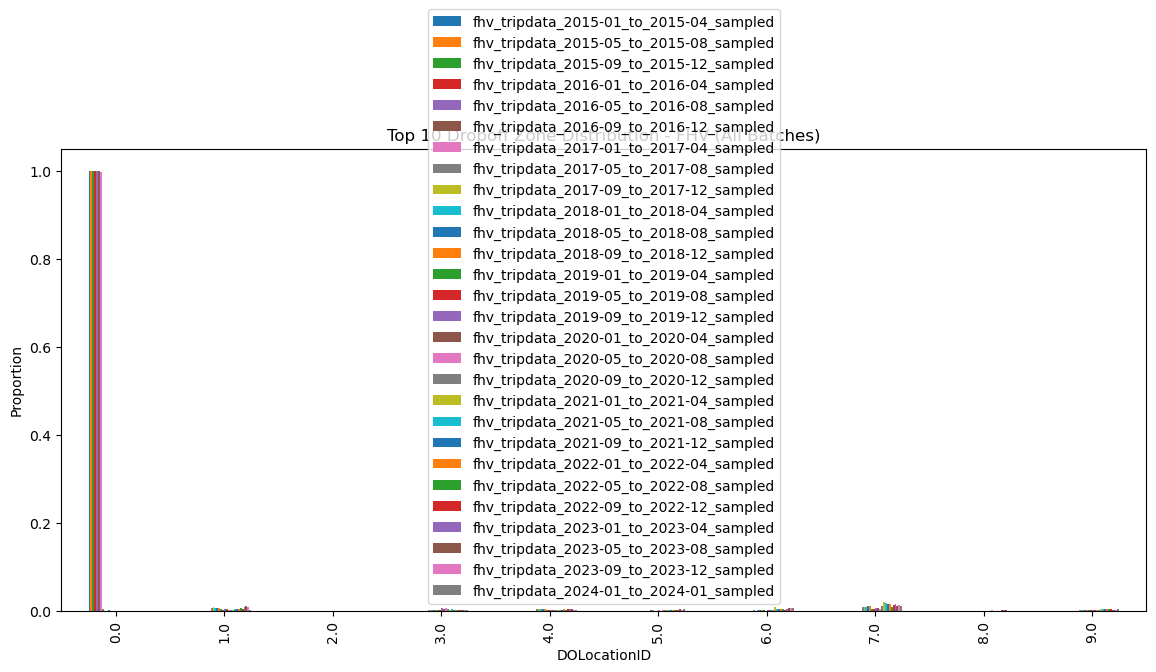

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

input_folder = 'D:/MSDS/Network Science/project/fhv_combined_data_sampled/'
file_list = sorted(glob.glob(input_folder + '*.csv'))

pu_distributions = {}
do_distributions = {}

for file in file_list:
    batch_name = os.path.basename(file).replace('.csv', '')
    df = pd.read_csv(file)
    
    pu_counts = df['PUlocationID'].value_counts(normalize=True)
    do_counts = df['DOlocationID'].value_counts(normalize=True)
    
    pu_distributions[batch_name] = pu_counts
    do_distributions[batch_name] = do_counts

# Combine into DataFrames
pu_df = pd.DataFrame(pu_distributions).fillna(0)
do_df = pd.DataFrame(do_distributions).fillna(0)

# Plot PU distribution
pu_df.head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Pickup Zone Distribution - FHV (All Batches)')
plt.ylabel('Proportion')
plt.xlabel('PULocationID')
plt.show()

# Plot DO distribution
do_df.head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Dropoff Zone Distribution - FHV (All Batches)')
plt.ylabel('Proportion')
plt.xlabel('DOLocationID')
plt.show()


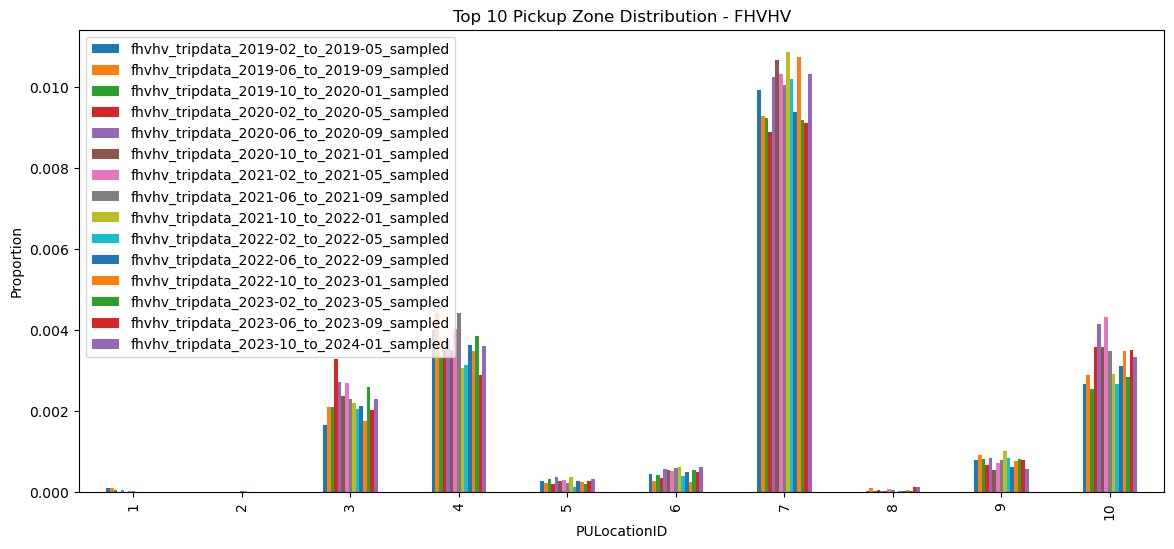

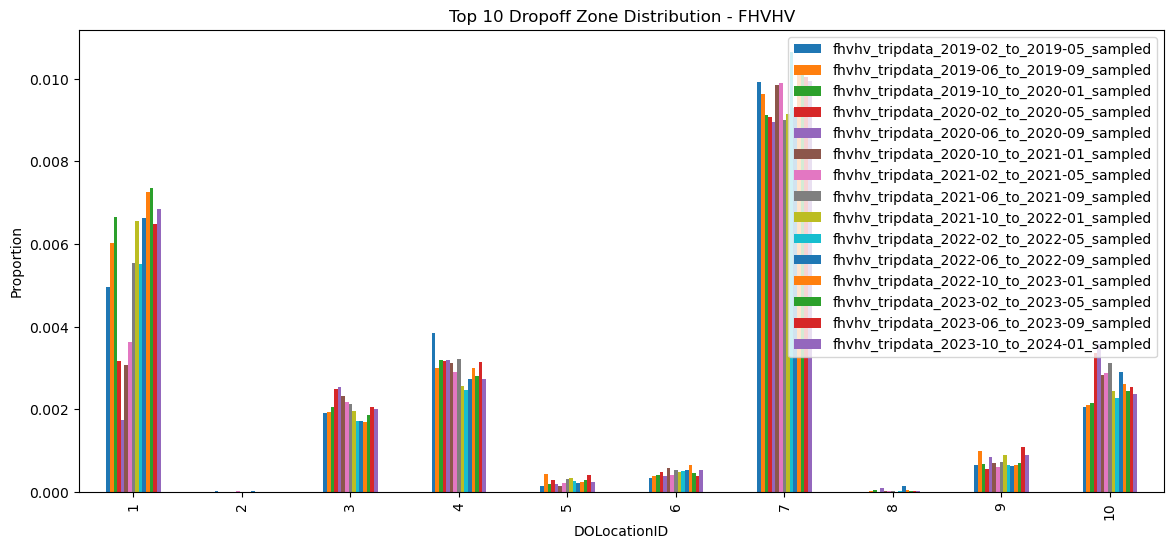

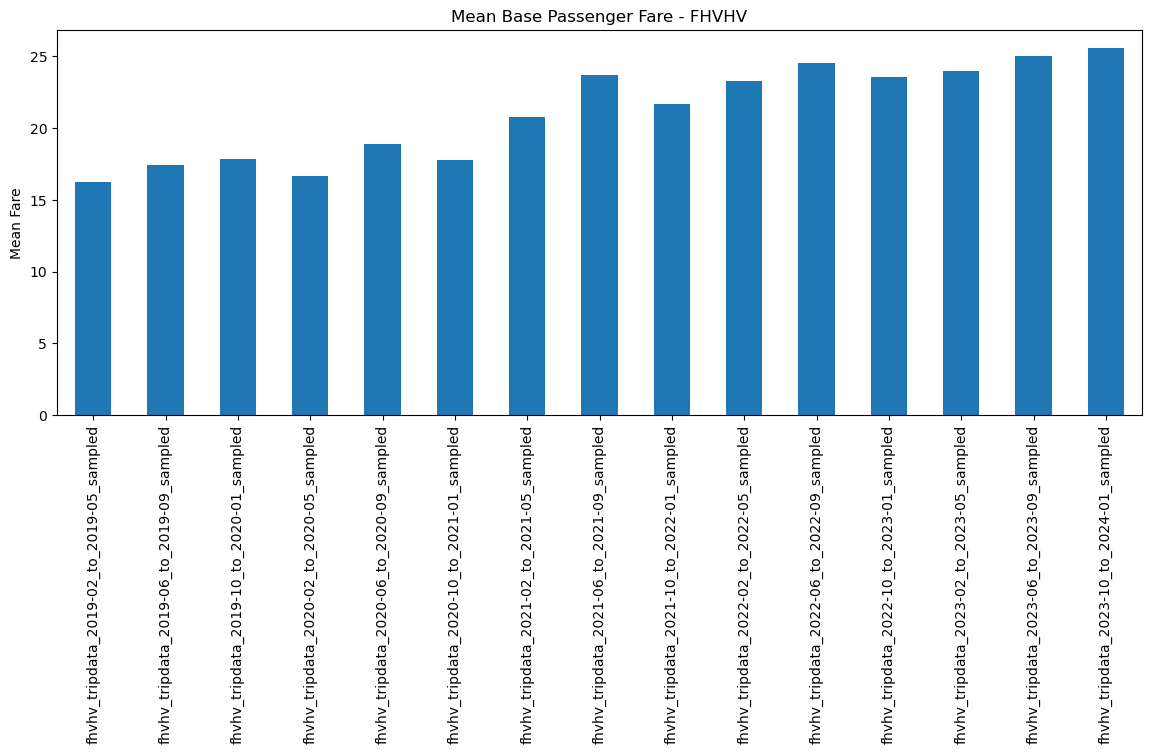

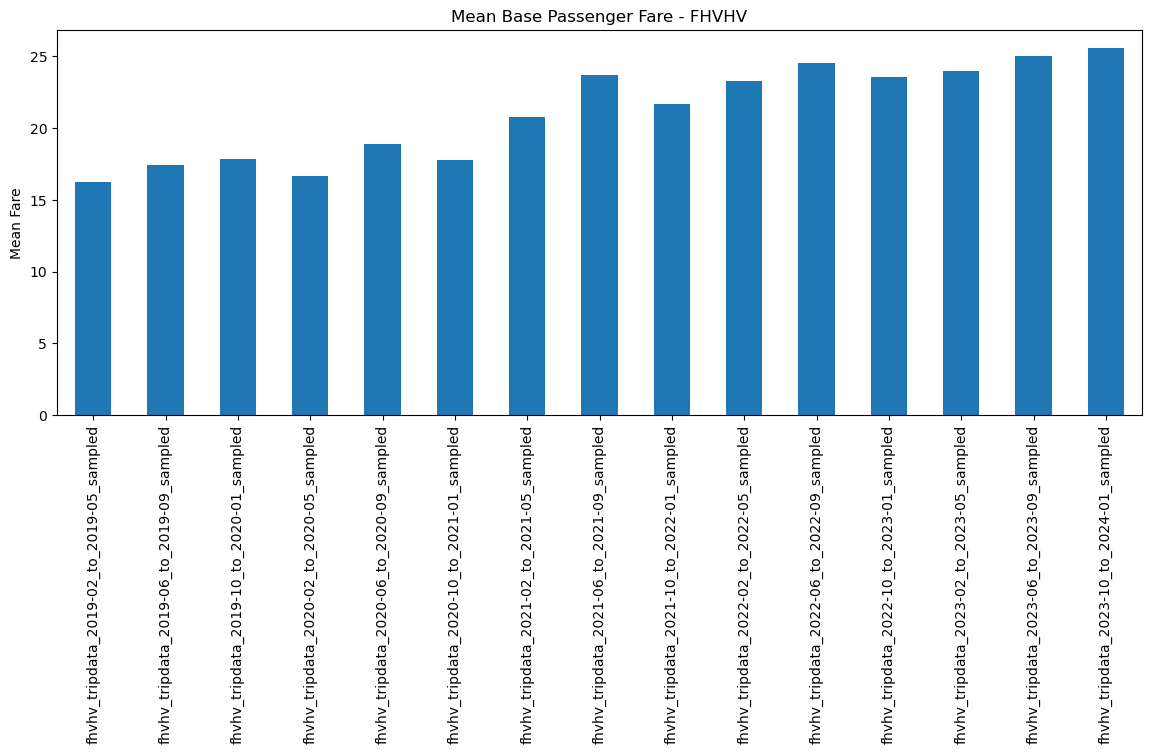

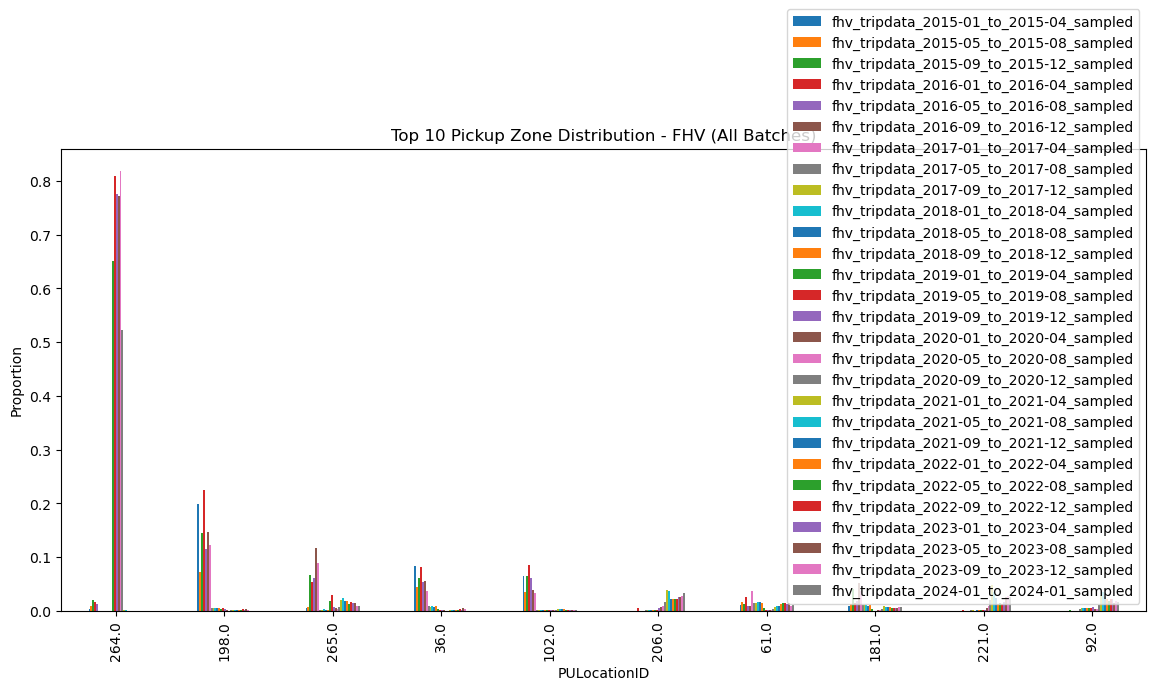

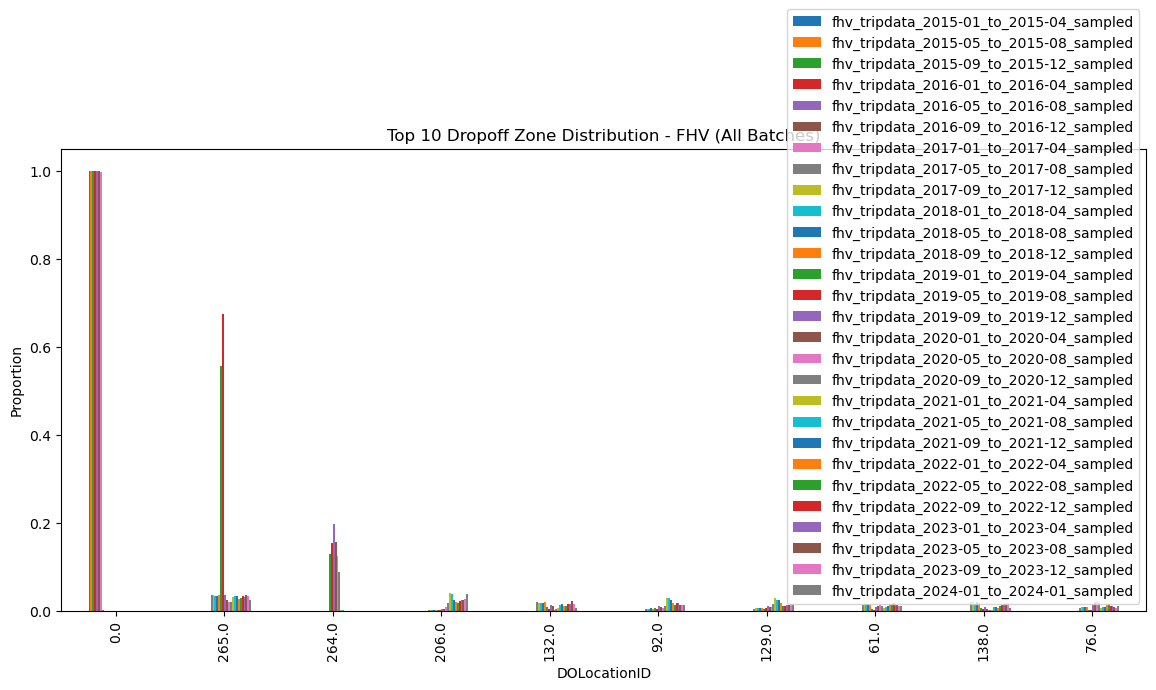

In [13]:
input_folder = 'D:/MSDS/Network Science/project/fhvhv_combined_data_sampled/'
file_list = sorted(glob.glob(input_folder + '*.csv'))

pu_distributions = {}
do_distributions = {}
fare_means = {}
distance_means = {}

for file in file_list:
    batch_name = os.path.basename(file).replace('.csv', '')
    df = pd.read_csv(file)
    
    pu_counts = df['PULocationID'].value_counts(normalize=True)
    do_counts = df['DOLocationID'].value_counts(normalize=True)
    
    pu_distributions[batch_name] = pu_counts
    do_distributions[batch_name] = do_counts
    
    # Fare and distance means
    if 'base_passenger_fare' in df.columns:
        fare_means[batch_name] = df['base_passenger_fare'].mean()
    if 'trip_miles' in df.columns:
        distance_means[batch_name] = df['trip_miles'].mean()

# PU/DO plots
pd.DataFrame(pu_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Pickup Zone Distribution - FHVHV')
plt.ylabel('Proportion')
plt.xlabel('PULocationID')
plt.show()

pd.DataFrame(do_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Dropoff Zone Distribution - FHVHV')
plt.ylabel('Proportion')
plt.xlabel('DOLocationID')
plt.show()

# Fare trend
pd.Series(fare_means).plot(kind='bar', figsize=(14,5))
plt.title('Mean Base Passenger Fare - FHVHV')
plt.ylabel('Mean Fare')
plt.show()

# Distance trend
# Fare trend
fare_series = pd.Series(fare_means).dropna()
if not fare_series.empty:
    fare_series.plot(kind='bar', figsize=(14,5))
    plt.title('Mean Base Passenger Fare - FHVHV')
    plt.ylabel('Mean Fare')
    plt.show()
else:
    print("⚠️ No valid fare data to plot.")

# Distance trend
# Get top 10 zones based on overall mean across all batches
top_zones = pu_df.mean(axis=1).sort_values(ascending=False).head(10).index

# Filter the DataFrame for those top zones
pu_df_top = pu_df.loc[top_zones]

# Plot Pickup zone distribution
pu_df_top.plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Pickup Zone Distribution - FHV (All Batches)')
plt.ylabel('Proportion')
plt.xlabel('PULocationID')
plt.show()

# Do the same for DO zones
top_zones_do = do_df.mean(axis=1).sort_values(ascending=False).head(10).index
do_df_top = do_df.loc[top_zones_do]

do_df_top.plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Dropoff Zone Distribution - FHV (All Batches)')
plt.ylabel('Proportion')
plt.xlabel('DOLocationID')
plt.show()





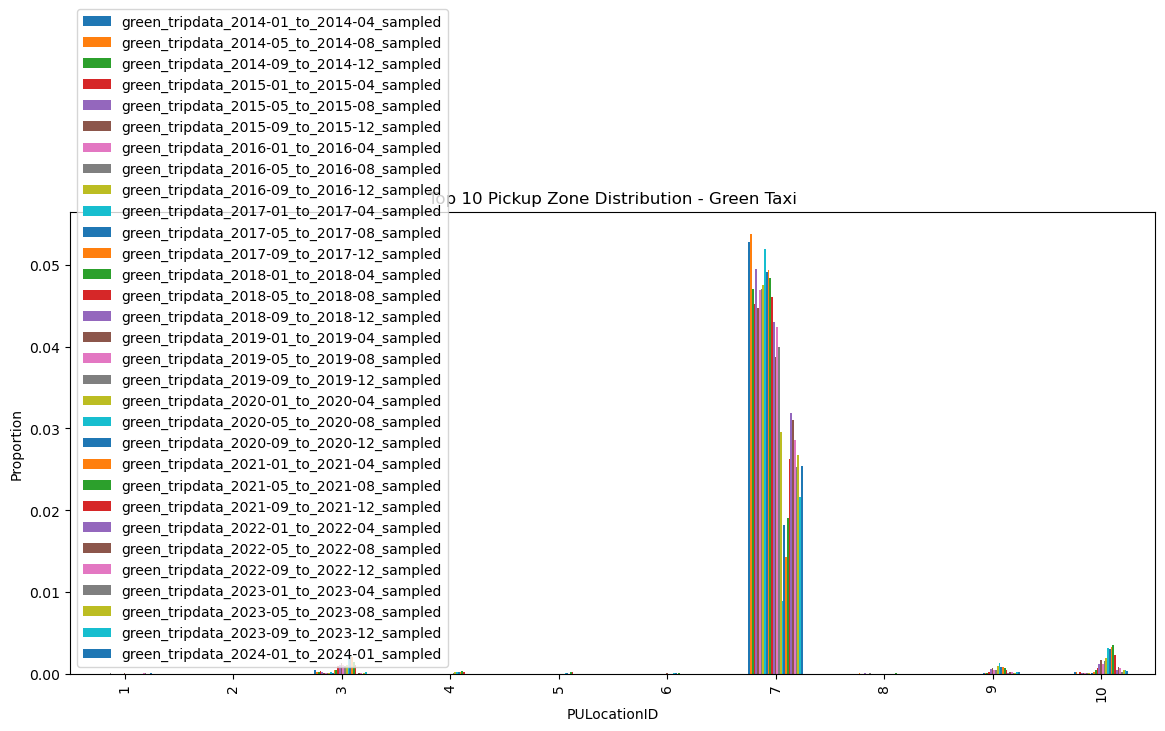

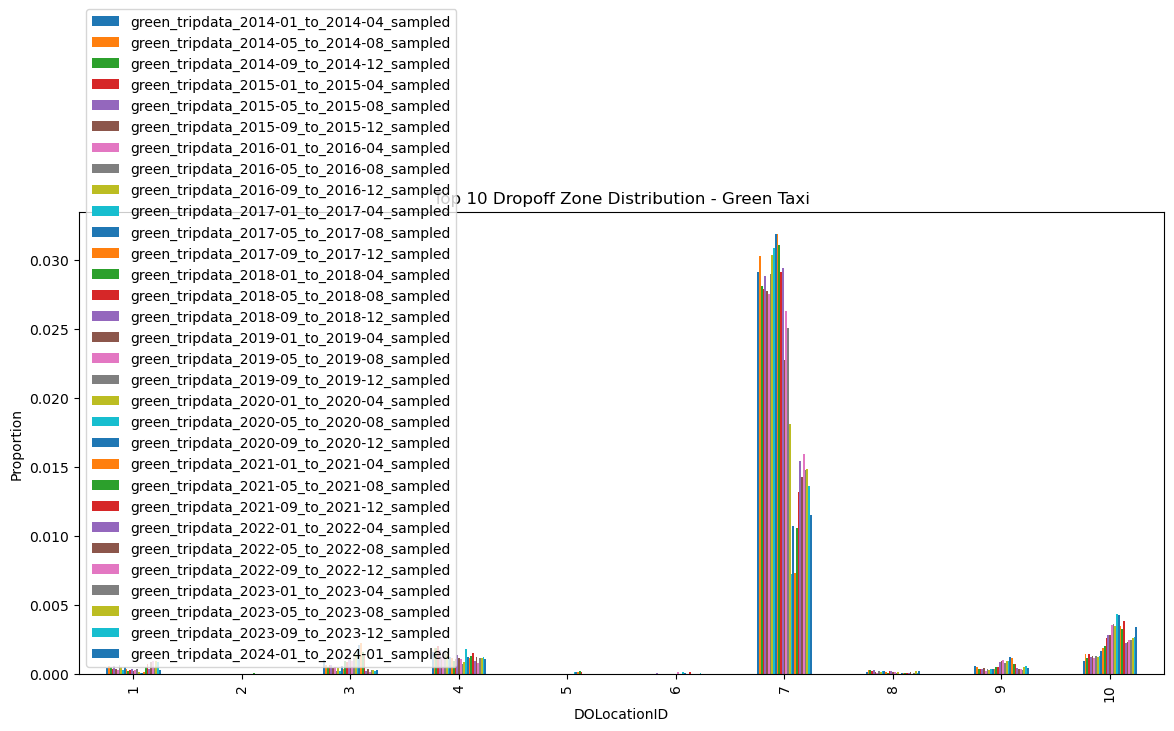

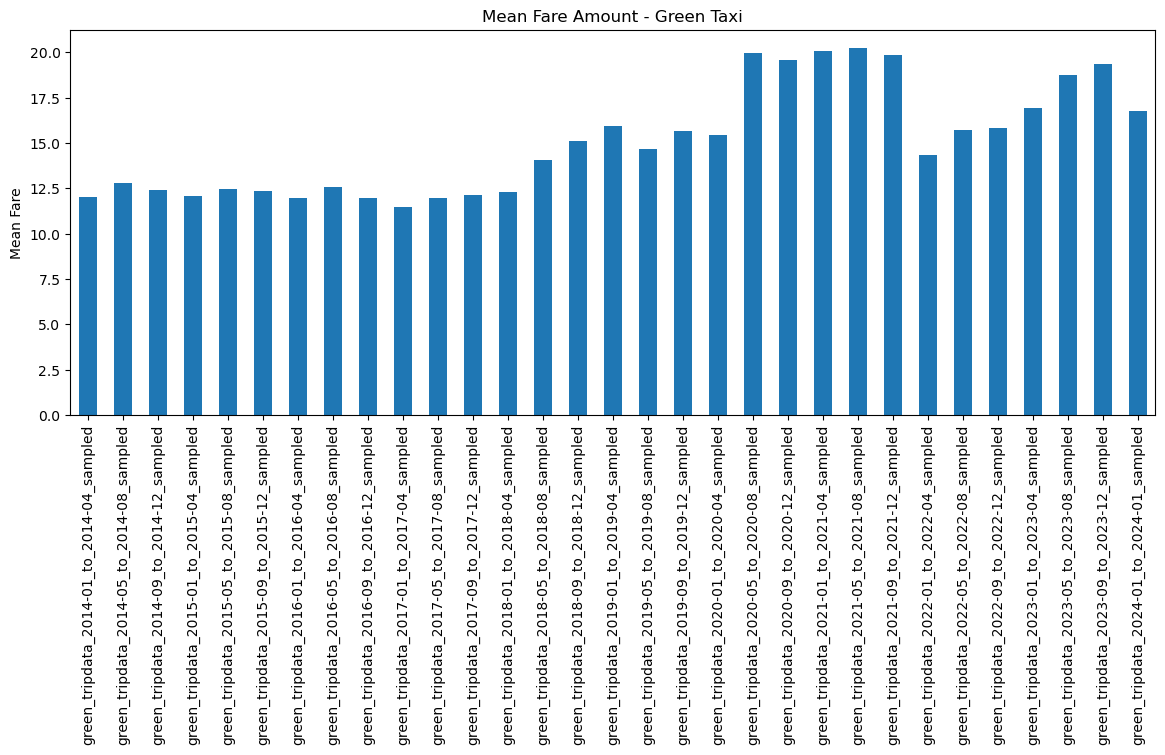

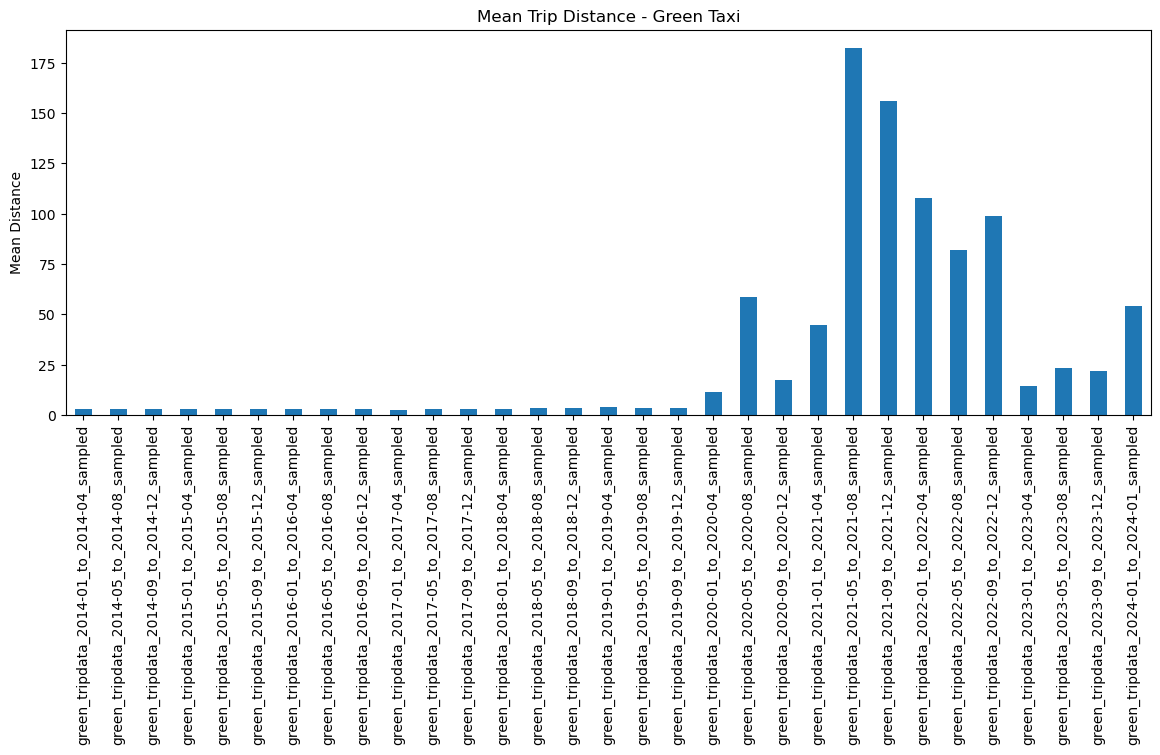


DEBUG: PU DataFrame columns:
 Index(['fhv_tripdata_2015-01_to_2015-04_sampled',
       'fhv_tripdata_2015-05_to_2015-08_sampled',
       'fhv_tripdata_2015-09_to_2015-12_sampled',
       'fhv_tripdata_2016-01_to_2016-04_sampled',
       'fhv_tripdata_2016-05_to_2016-08_sampled',
       'fhv_tripdata_2016-09_to_2016-12_sampled',
       'fhv_tripdata_2017-01_to_2017-04_sampled',
       'fhv_tripdata_2017-05_to_2017-08_sampled',
       'fhv_tripdata_2017-09_to_2017-12_sampled',
       'fhv_tripdata_2018-01_to_2018-04_sampled',
       'fhv_tripdata_2018-05_to_2018-08_sampled',
       'fhv_tripdata_2018-09_to_2018-12_sampled',
       'fhv_tripdata_2019-01_to_2019-04_sampled',
       'fhv_tripdata_2019-05_to_2019-08_sampled',
       'fhv_tripdata_2019-09_to_2019-12_sampled',
       'fhv_tripdata_2020-01_to_2020-04_sampled',
       'fhv_tripdata_2020-05_to_2020-08_sampled',
       'fhv_tripdata_2020-09_to_2020-12_sampled',
       'fhv_tripdata_2021-01_to_2021-04_sampled',
       'fhv_tripdat

In [14]:
input_folder = 'D:/MSDS/Network Science/project/green_combined_data_sampled/'
file_list = sorted(glob.glob(input_folder + '*.csv'))

pu_distributions = {}
do_distributions = {}
fare_means = {}
distance_means = {}

for file in file_list:
    batch_name = os.path.basename(file).replace('.csv', '')
    df = pd.read_csv(file)
    
    pu_counts = df['PULocationID'].value_counts(normalize=True)
    do_counts = df['DOLocationID'].value_counts(normalize=True)
    
    pu_distributions[batch_name] = pu_counts
    do_distributions[batch_name] = do_counts
    
    if 'fare_amount' in df.columns:
        fare_means[batch_name] = df['fare_amount'].mean()
    if 'trip_distance' in df.columns:
        distance_means[batch_name] = df['trip_distance'].mean()

# PU/DO plots
pd.DataFrame(pu_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Pickup Zone Distribution - Green Taxi')
plt.ylabel('Proportion')
plt.xlabel('PULocationID')
plt.show()

pd.DataFrame(do_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Dropoff Zone Distribution - Green Taxi')
plt.ylabel('Proportion')
plt.xlabel('DOLocationID')
plt.show()

# Fare trend
pd.Series(fare_means).plot(kind='bar', figsize=(14,5))
plt.title('Mean Fare Amount - Green Taxi')
plt.ylabel('Mean Fare')
plt.show()

# Distance trend
pd.Series(distance_means).plot(kind='bar', figsize=(14,5))
plt.title('Mean Trip Distance - Green Taxi')
plt.ylabel('Mean Distance')
plt.show()

print("\nDEBUG: PU DataFrame columns:\n", pu_df.columns)
print("\nDEBUG: First few rows of PU DataFrame:\n", pu_df.head())



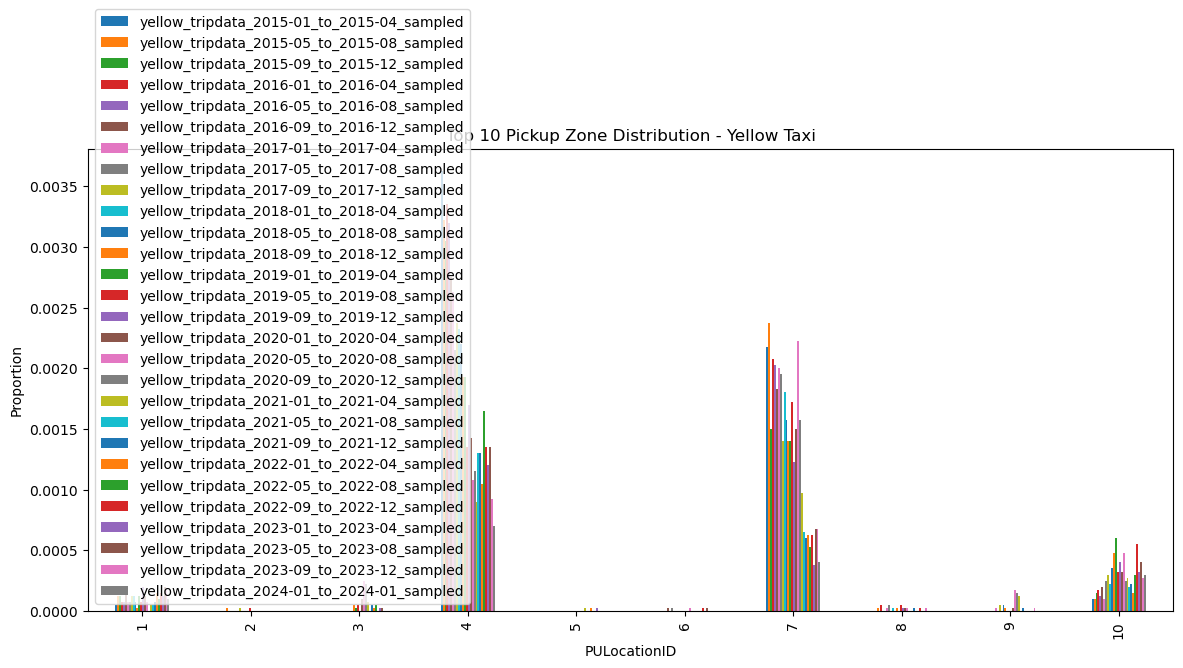

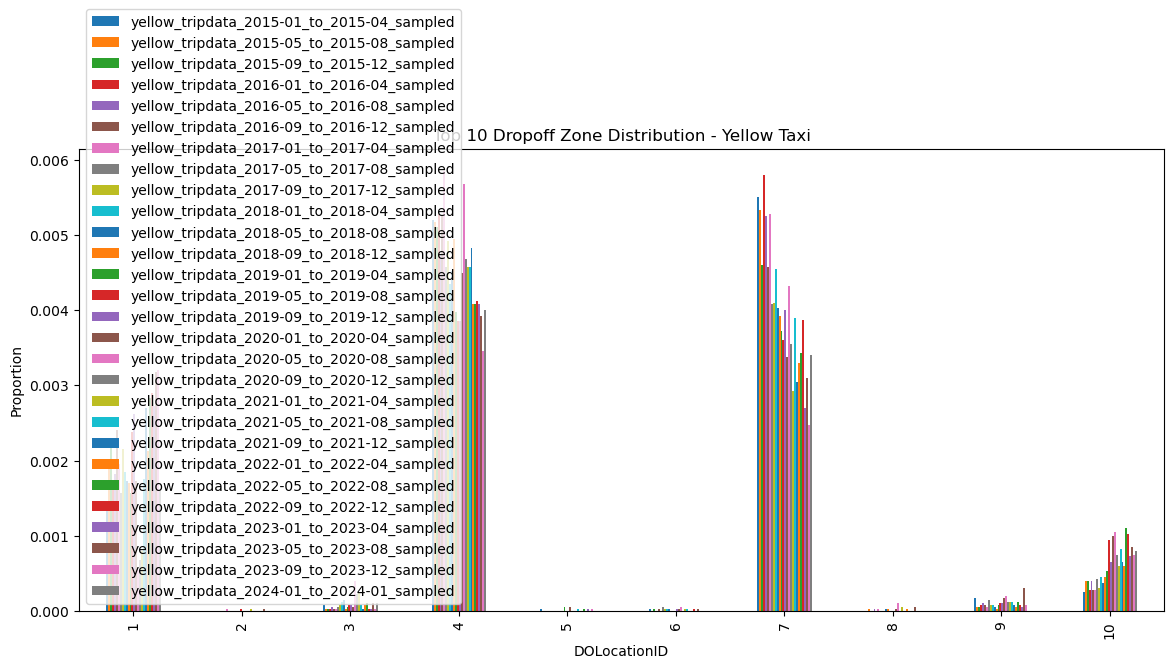

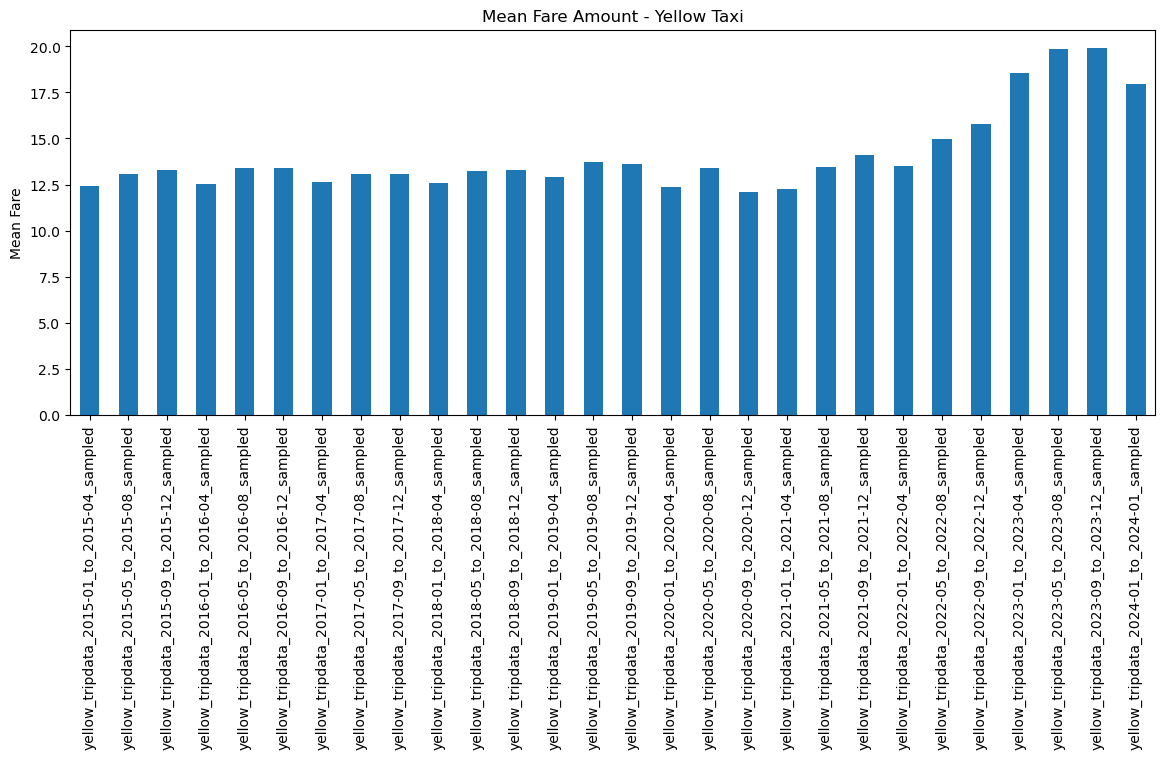

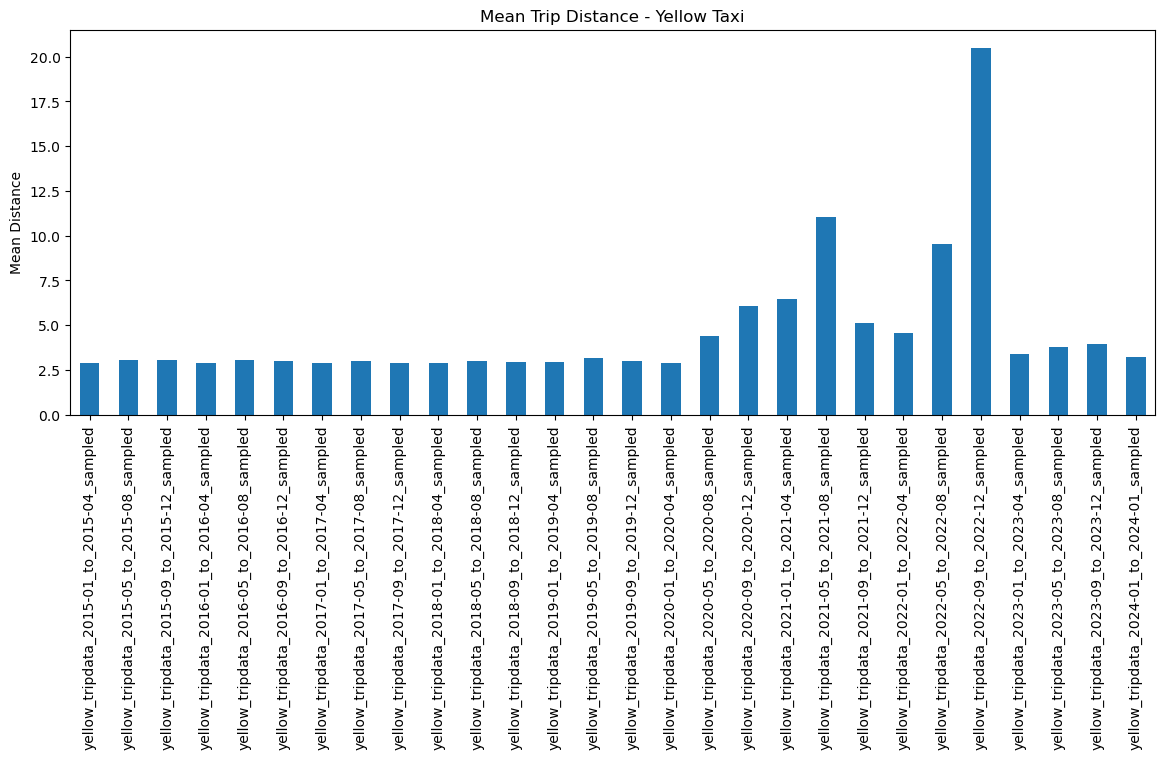

In [15]:
input_folder = 'D:/MSDS/Network Science/project/yellow_combined_data_sampled/'
file_list = sorted(glob.glob(input_folder + '*.csv'))

pu_distributions = {}
do_distributions = {}
fare_means = {}
distance_means = {}

for file in file_list:
    batch_name = os.path.basename(file).replace('.csv', '')
    df = pd.read_csv(file)
    
    pu_counts = df['PULocationID'].value_counts(normalize=True)
    do_counts = df['DOLocationID'].value_counts(normalize=True)
    
    pu_distributions[batch_name] = pu_counts
    do_distributions[batch_name] = do_counts
    
    if 'fare_amount' in df.columns:
        fare_means[batch_name] = df['fare_amount'].mean()
    if 'trip_distance' in df.columns:
        distance_means[batch_name] = df['trip_distance'].mean()

# PU/DO plots
pd.DataFrame(pu_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Pickup Zone Distribution - Yellow Taxi')
plt.ylabel('Proportion')
plt.xlabel('PULocationID')
plt.show()

pd.DataFrame(do_distributions).fillna(0).head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top 10 Dropoff Zone Distribution - Yellow Taxi')
plt.ylabel('Proportion')
plt.xlabel('DOLocationID')
plt.show()

# Fare trend
pd.Series(fare_means).plot(kind='bar', figsize=(14,5))
plt.title('Mean Fare Amount - Yellow Taxi')
plt.ylabel('Mean Fare')
plt.show()

# Distance trend
pd.Series(distance_means).plot(kind='bar', figsize=(14,5))
plt.title('Mean Trip Distance - Yellow Taxi')
plt.ylabel('Mean Distance')
plt.show()
